In [1]:
from notebooks.standardImports import *
import random as rn

# Displacement Operator

In [2]:
vacuumState = qt.basis(20, 0)
alphaReal = 1.5*rn.random()
alphaImag = 1.5*rn.random()
theta1 = 2*np.pi*rn.random()
alpha = (alphaReal+(alphaImag*1j))*(np.e**(theta1*1j))
displacementOp = qt.displacement(alpha, 20)
displacedVacuum = displacementOp @ vacuumState

In [3]:
phaseSpace = np.arange(-4, 4.1, 0.1)
wignerFunc = qt.Wigner(displacedVacuum, phaseSpace)

In [4]:
nPopulation = lambda n : abs(((np.e**(-(abs(alpha)**2)/2))*((alpha**n)/(np.sqrt(np.math.factorial(n))))))**2
nPopCalc = lambda n : abs(qt.innerProd(displacedVacuum, qt.basis(20, n)))**2

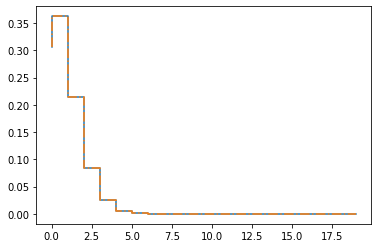

In [5]:
plt.step([i for i in range(20)], [nPopulation(n) for n in range(20)])
plt.step([i for i in range(20)], [nPopCalc(n) for n in range(20)], '-.')
plt.show()

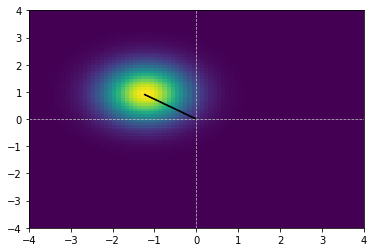

In [6]:
x, y = np.meshgrid(phaseSpace, phaseSpace)
plt.pcolormesh(y, x, wignerFunc)
plt.plot(phaseSpace, [0 for i in phaseSpace], color='silver', linestyle="--", linewidth='0.75')
plt.plot([0 for i in phaseSpace], phaseSpace, color='silver', linestyle="--", linewidth='0.75')
plt.arrow(0, 0, np.sqrt(2)*alpha.imag, np.sqrt(2)*alpha.real, width=0.02, head_width=0)
plt.show()

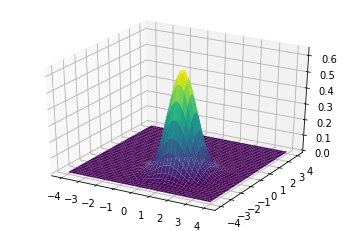

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x, y = np.meshgrid(phaseSpace, phaseSpace)
ax.plot_surface(x, y, wignerFunc, cmap='viridis')
plt.show()